In [1]:
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
from pekf.ekf import filter_routine, MVNormalParameters
from jax import jit

In [2]:
np.random.seed(0)

In [3]:
@jit
def transition_function(x):
    return jnp.arctan(x ** 2 - 1)

@jit
def observation_function(x):
    return jnp.sin(x)

In [4]:
Q = np.array([[0.5, 0.1],
              [0.1, 0.5]])

R = np.array([[0.25, -0.1],
              [-0.1, 0.25]])

Q_chol = np.linalg.cholesky(Q)
R_chol = np.linalg.cholesky(R)

In [5]:
x = np.random.randn(2)

In [6]:
n_steps = 1000

xs = [x]
ys = [observation_function(x) + R_chol @ np.random.randn(2)]
for _ in range(n_steps - 1):
    x = transition_function(x) + Q_chol @ np.random.randn(2)
    xs.append(x)
    y = observation_function(x) + R_chol @ np.random.randn(2)
    ys.append(y)
    
xs = np.stack(xs, 0)
ys = np.stack(ys, 0)

/u/95/corenfa1/unix/PycharmProjects/parallelEKF/venv/lib/python3.7/site-packages/jax/lib/xla_bridge.py:130: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


In [7]:
initial_state = MVNormalParameters(jnp.zeros(2), jnp.eye(2))
filtered_states = filter_routine(initial_state, ys, transition_function, Q, observation_function, R)

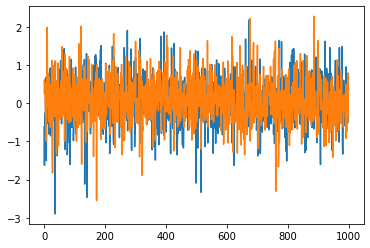

In [14]:
plt.plot(filtered_states.mean - xs)

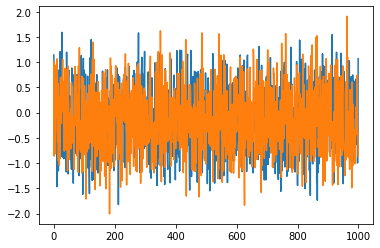

In [15]:
plt.plot(filtered_states.mean)

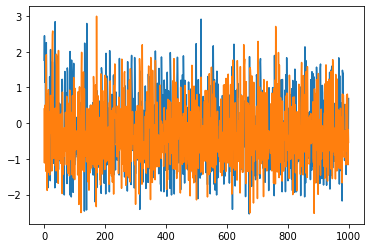

In [16]:
plt.plot(xs)